# Assignmennt 6 by Sarit Moses and Itamar Nini

we chose to do the 1st assignment. 

In [1]:
# imports 

import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

## Part 1: Generate 10,000 random genetic codes.
We chose to use two different approaches for this question. 
### Option 1: shuffle the codon-to-amino-acid assignment randomly while keeping the stop codons fixed.
This approach tests the "frozen accident" hypothesis, assuming that allocation of amino acids to their corresponding codons was arbitrary and was randomly fixed. In this method we will assume that the number of codons allocated to each of the amino acids stays the same, for simplicity of the code (although this could have also been selected randomly). 
### Option 2: keep the "box" configuration but mix the amino acids withing the boxes while keeping the stop codons fixed.
In this option, we are assuming that the evolutionary process of assigning amino acids to codons created the constraint of assigning similar codons to the same amino acid. Therefore, this approach will maintain similar codons being grouped together to the same amino acid, but the identity of the amino acids will change. This approach corresponds better with the "Coevolution" theory, stating that amino acids have evolved to match codons that are chemically similar to them in their properties. 

In [2]:
# define SGC mapping

sgc_mapping = {
    "TTT": "F", "TTC": "F", "TTA": "L", "TTG": "L",
    "CTT": "L", "CTC": "L", "CTA": "L", "CTG": "L",
    "ATT": "I", "ATC": "I", "ATA": "I", "ATG": "M", # ATG is also Start
    "GTT": "V", "GTC": "V", "GTA": "V", "GTG": "V",

    "TCT": "S", "TCC": "S", "TCA": "S", "TCG": "S",
    "CCT": "P", "CCC": "P", "CCA": "P", "CCG": "P",
    "ACT": "T", "ACC": "T", "ACA": "T", "ACG": "T",
    "GCT": "A", "GCC": "A", "GCA": "A", "GCG": "A",

    "TAT": "Y", "TAC": "Y", "TAA": "Stop", "TAG": "Stop",
    "CAT": "H", "CAC": "H", "CAA": "Q", "CAG": "Q",
    "AAT": "N", "AAC": "N", "AAA": "K", "AAG": "K",
    "GAT": "D", "GAC": "D", "GAA": "E", "GAG": "E",

    "TGT": "C", "TGC": "C", "TGA": "Stop", "TGG": "W",
    "CGT": "R", "CGC": "R", "CGA": "R", "CGG": "R",
    "AGT": "S", "AGC": "S", "AGA": "R", "AGG": "R",
    "GGT": "G", "GGC": "G", "GGA": "G", "GGG": "G"
}

In [3]:
# approach 1: shuffle randomly while keeping stop codons

stop_codons = [codon for codon, aa in sgc_mapping.items() if aa == "Stop"]
non_stop_codons = [codon for codon, aa in sgc_mapping.items() if aa != "Stop"]
non_stop_amino_acids = [aa for aa in sgc_mapping.values() if aa != "Stop"]

frozen_mistakes = [] # generate empty list

for i in range(10000):
    new_code = {}
    for codon in stop_codons:
        new_code[codon] = "Stop" # keep stop codons fixed
        
    random.shuffle(non_stop_amino_acids) # shuffle randomly the codon list
    for j, codon in enumerate(non_stop_codons):
        new_code[codon] = non_stop_amino_acids[j] # assign each codon to an amino acid
    frozen_mistakes.append(new_code) # add this random code to list of random codes

print(len(frozen_mistakes))
print(len(frozen_mistakes[1]))
print(frozen_mistakes[1])    

10000
64
{'TAA': 'Stop', 'TAG': 'Stop', 'TGA': 'Stop', 'TTT': 'R', 'TTC': 'R', 'TTA': 'M', 'TTG': 'D', 'CTT': 'P', 'CTC': 'Y', 'CTA': 'R', 'CTG': 'T', 'ATT': 'E', 'ATC': 'I', 'ATA': 'L', 'ATG': 'L', 'GTT': 'T', 'GTC': 'N', 'GTA': 'N', 'GTG': 'K', 'TCT': 'E', 'TCC': 'G', 'TCA': 'A', 'TCG': 'G', 'CCT': 'C', 'CCC': 'V', 'CCA': 'H', 'CCG': 'G', 'ACT': 'R', 'ACC': 'L', 'ACA': 'P', 'ACG': 'Y', 'GCT': 'Q', 'GCC': 'C', 'GCA': 'V', 'GCG': 'Q', 'TAT': 'I', 'TAC': 'R', 'CAT': 'D', 'CAC': 'S', 'CAA': 'V', 'CAG': 'F', 'AAT': 'L', 'AAC': 'P', 'AAA': 'S', 'AAG': 'T', 'GAT': 'A', 'GAC': 'W', 'GAA': 'T', 'GAG': 'P', 'TGT': 'S', 'TGC': 'S', 'TGG': 'K', 'CGT': 'A', 'CGC': 'I', 'CGA': 'L', 'CGG': 'V', 'AGT': 'L', 'AGC': 'S', 'AGA': 'S', 'AGG': 'R', 'GGT': 'H', 'GGC': 'G', 'GGA': 'F', 'GGG': 'A'}


In [4]:
# approach 2: shuffle boxes

stop_codons = [codon for codon, aa in sgc_mapping.items() if aa == "Stop"]
amino_acid_list = list(set([aa for aa in sgc_mapping.values() if aa != "Stop"]))

# get boxes
box_list = []
for acid in amino_acid_list:
    codons = [codon for codon, aa in sgc_mapping.items() if aa == acid]
    box_list.append(codons)

coevolutions = [] # generate empty list

for i in range(10000):
    new_code = {}
    for codon in stop_codons:
        new_code[codon] = "Stop" # keep stop codons fixed
        
    random.shuffle(box_list) # shuffle randomly the codon list
    for j, aa in enumerate(amino_acid_list):
        for codon in box_list[j]:
            new_code[codon] = aa # assign each codon to an amino acid
    coevolutions.append(new_code) # add this random code to list of random codes

print(len(coevolutions))
print(len(coevolutions[1]))
print(coevolutions[1])    

10000
64
{'TAA': 'Stop', 'TAG': 'Stop', 'TGA': 'Stop', 'GGT': 'D', 'GGC': 'D', 'GGA': 'D', 'GGG': 'D', 'TTT': 'H', 'TTC': 'H', 'TGT': 'P', 'TGC': 'P', 'TTA': 'S', 'TTG': 'S', 'CTT': 'S', 'CTC': 'S', 'CTA': 'S', 'CTG': 'S', 'ACT': 'I', 'ACC': 'I', 'ACA': 'I', 'ACG': 'I', 'AAT': 'N', 'AAC': 'N', 'ATT': 'R', 'ATC': 'R', 'ATA': 'R', 'CCT': 'C', 'CCC': 'C', 'CCA': 'C', 'CCG': 'C', 'TCT': 'F', 'TCC': 'F', 'TCA': 'F', 'TCG': 'F', 'AGT': 'F', 'AGC': 'F', 'AAA': 'V', 'AAG': 'V', 'GCT': 'G', 'GCC': 'G', 'GCA': 'G', 'GCG': 'G', 'TAT': 'L', 'TAC': 'L', 'GTT': 'Q', 'GTC': 'Q', 'GTA': 'Q', 'GTG': 'Q', 'CAA': 'W', 'CAG': 'W', 'GAT': 'T', 'GAC': 'T', 'GAA': 'A', 'GAG': 'A', 'CAT': 'M', 'CAC': 'M', 'ATG': 'K', 'CGT': 'Y', 'CGC': 'Y', 'CGA': 'Y', 'CGG': 'Y', 'AGA': 'Y', 'AGG': 'Y', 'TGG': 'E'}


## Part 2: Generate an Error-Cost Function
We chose to use the Grantham's distance matrix. This matrix measures how distant are two amino acids from each other, based on three properties: molecular volume, polarity and composition. These three measures represent different possible effects of replacing one amino acid by another: The new amino acid can take more or less space (therefore changing the volume of specific areas of the protein), it can have different polarity (therefore being able to participate in different kinds of chemical bonds and reactions), and it can have a different atom composition (therefore altering the nutrient economy of the cell). 
Distance difference D for each pair of amino acid i and j is calculated as:

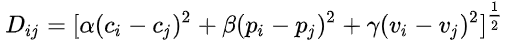

where c = composition, p = polarity, and v = molecular volume; and are constants of squares of the inverses of the mean distance for each property, respectively equal to 1.833, 0.1018, 0.000399. According to Grantham's distance, most similar amino acids are leucine and isoleucine and the most distant are cysteine and tryptophan.

For this assignment, we downloaded the Grantham's distance matrix from https://sourceforge.net/projects/granthamdist/files/ .

In [5]:
# load matrix

grantham_matrix = pd.read_csv('AAdistMatrix_Grantham.cnv', sep="\t", index_col=0)

## Part 3: Analysis

In [6]:
# define functions:

def calculate_one_base_neighbors(codon):
    """
    Generates all codons that are one base different from the given codon.
    """
    neighbors = []
    bases = ['A', 'T', 'C', 'G'] # Assuming DNA for codons
    
    for i in range(3): # For each position (0, 1, 2)
        original_base = codon[i]
        for base in bases:
            if base != original_base:
                neighbor_codon = list(codon)
                neighbor_codon[i] = base
                neighbors.append("".join(neighbor_codon))
    return neighbors

def get_distances_for_codon(codon, genetic_code_dict, dist_matrix):
    """
    calculates sum of grantham distances for all neighbors of single codon
    """
    neighbors = calculate_one_base_neighbors(codon)
    original_aa = genetic_code_dict[codon]
    sum_distances = 0
    for neighbor in neighbors:
        new_aa = genetic_code_dict[neighbor]
        if new_aa == original_aa:
            sum_distances += 0
        elif new_aa == "Stop" or original_aa == "Stop":
            sum_distances += 1000 # large arbotrary penalty for adding or deleting stop codon
        else:
            distance = dist_matrix.loc[original_aa, new_aa]
            sum_distances += distance
    return sum_distances

def get_distances_for_entire_code(genetic_code_dict, dist_matrix):
    """
    Calculates sum of distances of all one-base neighbors of all codons in the matrix
    """
    sum_distances = 0
    for codon in genetic_code_dict.keys():
        sum_distances += get_distances_for_codon(codon, genetic_code_dict, dist_matrix)
    return sum_distances
        
    

In [7]:
# get sum of distances for each of the simulations

frozen_mistakes_dists = []
for i in range(10000):
    dist = get_distances_for_entire_code(frozen_mistakes[i], grantham_matrix)
    frozen_mistakes_dists.append(dist)

coevolutions_dists = []
for i in range(10000):
    dist = get_distances_for_entire_code(coevolutions[i], grantham_matrix)
    coevolutions_dists.append(dist)

In [8]:
# calculate distance for the SGC

SGC_dist = get_distances_for_entire_code(sgc_mapping, grantham_matrix)

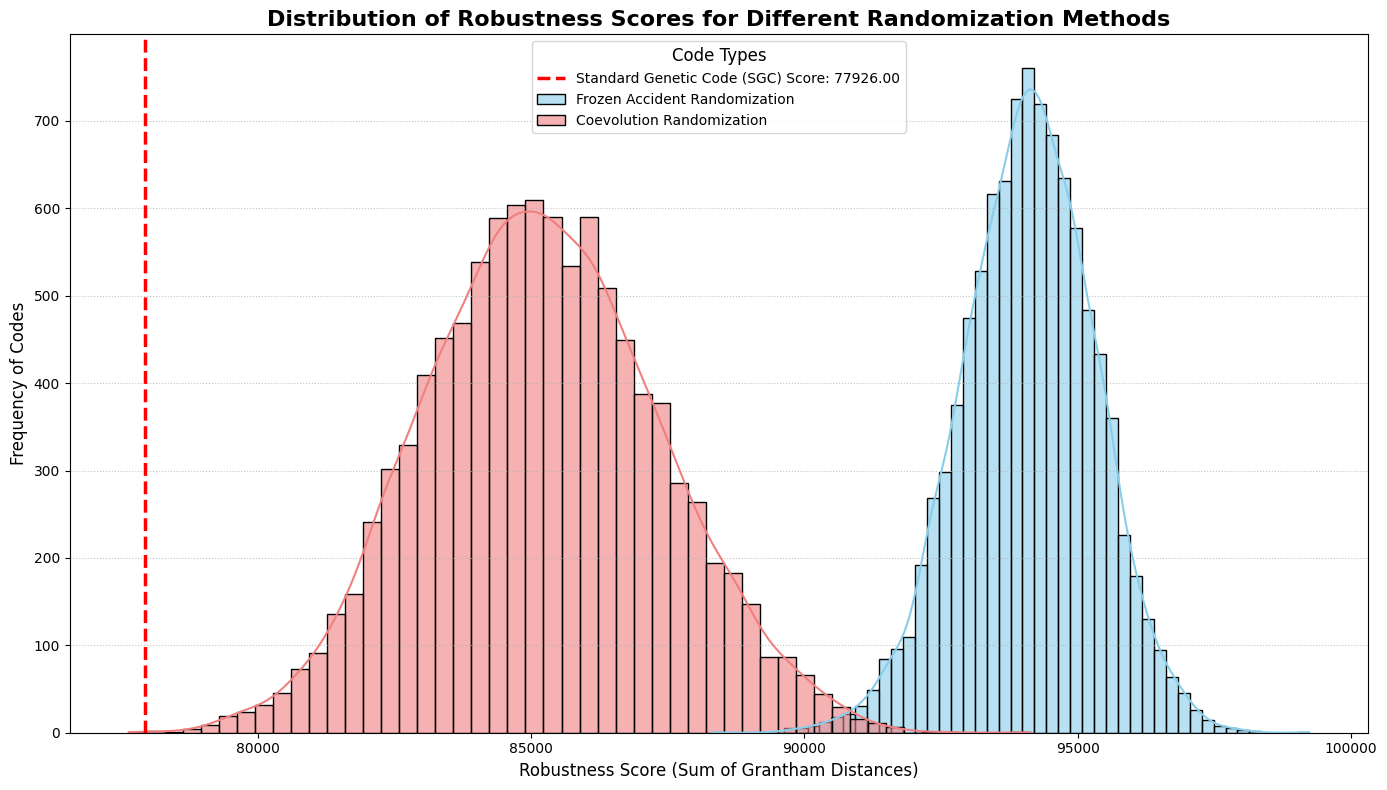

In [9]:
# plot distributions for both approaches

plt.figure(figsize=(14, 8)) # Slightly larger figure for better readability with two histograms

# Plot the first histogram (e.g., 'Frozen Mistakes')
sns.histplot(
    frozen_mistakes_dists,
    bins=50, # Number of bins for the histogram
    kde=True, # Add a Kernel Density Estimate plot (smooth curve)
    color='skyblue', # Color for the bars and KDE line
    edgecolor='black', # Color for the bar borders
    alpha=0.6, # Transparency of the bars (so you can see overlapping histograms)
    label='Frozen Accident Randomization' # Label for the legend
)

# Plot the second histogram (e.g., 'Coevolution')
sns.histplot(
    coevolutions_dists,
    bins=50,
    kde=True,
    color='lightcoral', # Different color for the second histogram
    edgecolor='black',
    alpha=0.6,
    label='Coevolution Randomization' # Label for the legend
)

# Add a vertical line for the SGC score
plt.axvline(
    x=SGC_dist, # X-coordinate where the line will be drawn
    color='red', # Color of the line
    linestyle='--', # Dashed line style
    linewidth=2.5, # Thickness of the line
    label=f'Standard Genetic Code (SGC) Score: {SGC_dist:.2f}' # Label for the SGC line in the legend
)

# Customize the plot title and axis labels
plot_title = 'Distribution of Robustness Scores for Different Randomization Methods'
x_axis_label = 'Robustness Score (Sum of Grantham Distances)'
y_axis_label = 'Frequency of Codes'

plt.title(plot_title, fontsize=16, fontweight='bold') # Set title with options
plt.xlabel(x_axis_label, fontsize=12) # Set X-axis label with options
plt.ylabel(y_axis_label, fontsize=12) # Set Y-axis label with options

# Add a legend to differentiate the histograms and the SGC line
plt.legend(title='Code Types', fontsize=10, title_fontsize=12)

# Add a grid for better readability
plt.grid(axis='y', alpha=0.75, linestyle=':') # Horizontal grid lines

# Optimize layout to prevent labels from overlapping
plt.tight_layout()

# Display the plot
plt.show()


In [10]:
# calculate percentile of genetic code in each option

percentile_frozen_accident = np.sum(np.array(frozen_mistakes_dists) <= SGC_dist) / 10000 * 100
percentile_coevolution = np.sum(np.array(coevolutions_dists) <= SGC_dist) / 10000 * 100

print(f"Percentile of SGC robustness score: \n{percentile_frozen_accident} in comparison to frozen accident theory, \n{percentile_coevolution} in compariton so coevolution theory")

Percentile of SGC robustness score: 
0.0 in comparison to frozen accident theory, 
0.01 in compariton so coevolution theory


### Conclusions and summary

As can be seen in the results (see plot above and the calculation of percentile), The SGC is the best out of the 10,000 random generated codes in light of the frozen accident theory, and almost the best in light of the coevolution theory. This shows that the SGC was probably selected for, and not randomly selected. 

Another interesting result is that the distribution of random coevolution codes (generated by swapping "boxes") was significantly lower than the distribution of frozen accident codes. This may support the argument that the genetic code as evolved along with the expansion of the amino acid pool, rather than randomly assigned codons and amino acids to each other. This may be another evidence in support of the coevolution theory. 